In [16]:
import numpy as np
from matplotlib import pyplot as plt

## Linear Regression using Gradient Descent


In [73]:
x=np.array([1,2,3,4,5], dtype=float)
y=np.array([5,8,11,15,18], dtype=float)

print(x)
print(y)

[1. 2. 3. 4. 5.]
[ 5.  8. 11. 15. 18.]


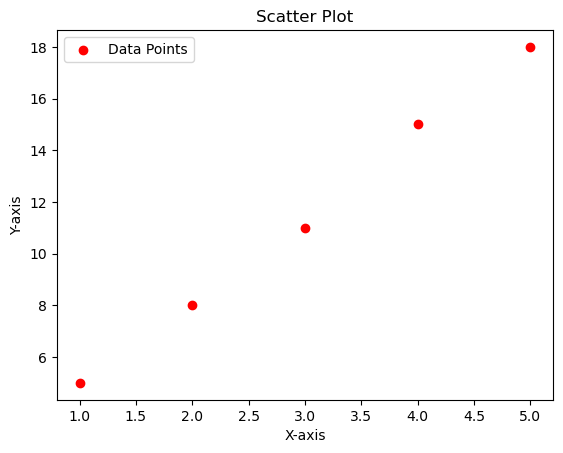

In [74]:
plt.scatter(x, y, color="red", label="Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")
plt.legend()
plt.show()


In [82]:
# m_curr = b_curr = 0
iterations = 100
n = len(x)
learning_rate = 0.08

In [76]:
def compute_mse(y, y_pred):
    return np.sum((y-y_pred)**2)/n

In [77]:
def gradient_descent(x, y, iterations, learning_rate):
    m_curr = b_curr = 0
    for i in range(iterations):
        y_pred = m_curr * x + b_curr
        cost = compute_mse(y, y_pred)
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print(f"m {m_curr}, b {b_curr}, cost {cost}, iteration {i}")

    return m_curr, b_curr

In [83]:
m_curr, b_curr = gradient_descent(x, y, iterations, learning_rate)

m 6.5280000000000005, b 1.824, cost 151.8, iteration 0
m 0.6911999999999985, b 0.22271999999999958, cost 121.06003200000005, iteration 1
m 5.895782400000002, b 1.6793088000000005, cost 96.54866442240012, iteration 2
m 1.2411371519999976, b 0.4046438399999994, cost 77.00378035863564, iteration 3
m 5.390506721280002, b 1.5681549926400007, cost 61.41901223178313, iteration 4
m 1.678500495359998, b 0.5538069676031996, cost 48.991917793123534, iteration 5
m 4.986512279076866, b 1.4835176150138887, cost 39.08265753353315, iteration 6
m 2.0261622126949153, b 0.6766289026547709, cost 31.181045543257017, iteration 7
m 4.663334845077575, b 1.4198104161364484, cost 24.880277056612176, iteration 8
m 2.3023565179955474, b 0.7782400239173806, cost 19.85597974382916, iteration 9
m 4.404653834843041, b 1.372590491452737, cost 15.849509966383527, iteration 10
m 2.521619649621975, b 0.8627421720956395, cost 12.654633812762835, iteration 11
m 4.197452823681392, b 1.3383259927417892, cost 10.1069070358181

In [84]:
def predict(x):
    return m_curr * x + b_curr


In [85]:
x1=10
y_pred = predict(x1)
print(f"Predicted value for x={x1} is {y_pred}")

Predicted value for x=10 is 34.56163615564877


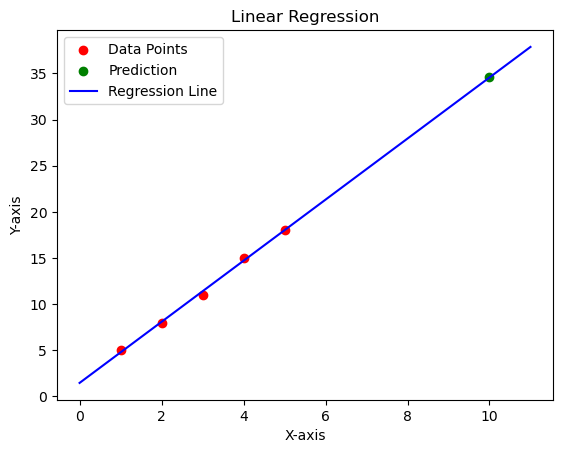

In [86]:
plt.scatter(x, y, color="red", label="Data Points")
plt.scatter(x1, predict(x1), color="green", label="Prediction")
a= np.linspace(0, 11, 100)
plt.plot(a, m_curr*a+b_curr, color="blue", label="Regression Line")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Linear Regression")
plt.legend()
plt.show()

## Polynomial Regression using Gradient Descent

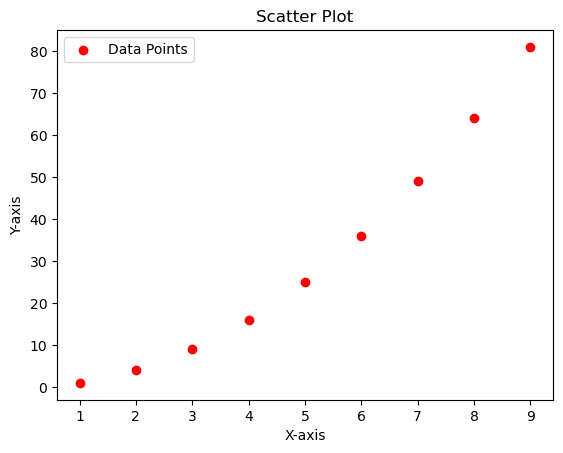

In [154]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.float64)
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81], dtype=np.float64) 

plt.scatter(x, y, color="red", label="Data Points")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")
plt.legend()
plt.show()


In [155]:
# Function to normalize the input data
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

In [156]:
# Function to generate polynomial features up to a given degree
def generate_polynomial_features(x, degree):
    x_poly = np.ones((len(x), degree + 1))  # Initialize matrix of ones
    for i in range(1, degree + 1):
        x_poly[:, i] = x ** i  # Fill columns with x^i
    return x_poly

In [157]:
# Function for Gradient Descent
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        y_pred = np.dot(X, theta)  # Predicted values
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # Mean squared error (MSE)
        gradients = (1 / m) * np.dot(X.T, (y_pred - y))  # Calculate gradients
        theta = theta - learning_rate * gradients  # Update the coefficients
        if i % 1000 == 0:  # Print cost every 1000 iterations
            print(f"Iteration {i}, Cost: {cost}")
    return theta

In [158]:
# Function for Gradient Descent with L2 Regularization (Ridge Regression)
def gradient_descent_regularized(X, y, learning_rate, iterations, regularization_param):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        y_pred = np.dot(X, theta)  # Predicted values
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) + (regularization_param / (2 * m)) * np.sum(theta ** 2)  # MSE with L2 regularization
        gradients = (1 / m) * np.dot(X.T, (y_pred - y)) + (regularization_param / m) * theta  # Regularized gradients
        theta = theta - learning_rate * gradients  # Update the coefficients
        if i % 1000 == 0:  # Print cost every 1000 iterations
            print(f"Iteration {i}, Cost: {cost}")
            if np.isnan(cost):  # Check for numerical issues
                print("Numerical instability detected!")
                break
    return theta

In [215]:
# Polynomial regression parameters
degree = 6  # Adjusted degree of the polynomial to reduce complexity
learning_rate = 0.01  # Increased learning rate slightly for better convergence
iterations = 20000  # Increased iterations to allow more time for convergence
regularization_param = 0.001  # Reduced regularization to prevent underfitting


In [216]:
# Normalize the input data to prevent overflow
x_normalized = normalize(x)

In [217]:
# Generate polynomial features for the given degree
X_poly = generate_polynomial_features(x_normalized, degree)

In [218]:
# Perform gradient descent to fit the model
theta = gradient_descent_regularized(X_poly, y, learning_rate, iterations, regularization_param)

Iteration 0, Cost: 851.8333333333333
Iteration 1000, Cost: 1.4022298873511154
Iteration 2000, Cost: 0.7759169447811022
Iteration 3000, Cost: 0.6078176234466642
Iteration 4000, Cost: 0.4932314405628445
Iteration 5000, Cost: 0.40429189416549277
Iteration 6000, Cost: 0.3344083728854421
Iteration 7000, Cost: 0.2794328462079207
Iteration 8000, Cost: 0.23617430619227153
Iteration 9000, Cost: 0.2021288326853592
Iteration 10000, Cost: 0.17532822482027738
Iteration 11000, Cost: 0.15422512889745615
Iteration 12000, Cost: 0.13760301424245777
Iteration 13000, Cost: 0.12450542215325164
Iteration 14000, Cost: 0.11418034813327349
Iteration 15000, Cost: 0.10603651948493523
Iteration 16000, Cost: 0.09960902398922718
Iteration 17000, Cost: 0.09453228964893057
Iteration 18000, Cost: 0.09051884324814898
Iteration 19000, Cost: 0.0873426117573649


In [219]:
# Make predictions using the learned model
y_pred = np.dot(X_poly, theta)
# Print the learned coefficients
print(f"Learned coefficients (theta): {theta}")

Learned coefficients (theta): [25.10022875 25.11374649  5.88677732  1.08274768  0.86500045 -0.33285559
 -0.23282116]


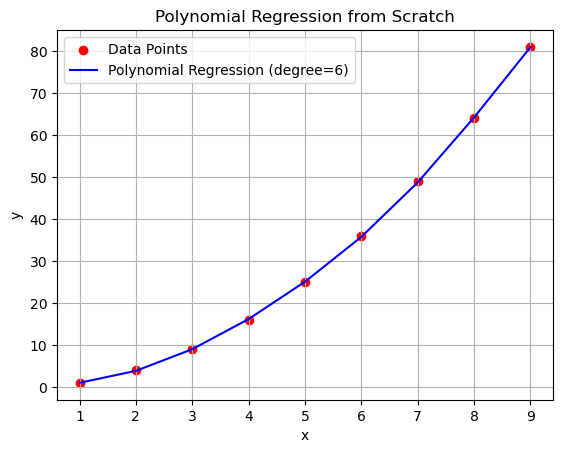

In [220]:
# Plot the original data points and the polynomial regression curve
plt.scatter(x, y, color="red", label="Data Points")  # Scatter plot for data points
plt.plot(x, y_pred, color="blue", label=f"Polynomial Regression (degree={degree})")  # Regression curve
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression from Scratch")
plt.legend()
plt.grid(True)
plt.show()

## Now Polynomial regression with some noise

In [221]:
# Generate a larger dataset and add noise
np.random.seed(42)  # Set random seed for reproducibility

In [222]:
# Generate larger x values between 0 and 20
x = np.linspace(0, 20, 100)
# Generate y values using a quadratic relationship and add noise
y = x**2 + np.random.normal(0, 20, size=x.shape)  # Add Gaussian noise with mean 0 and standard deviation 20

In [256]:
# Polynomial regression parameters
degree = 1  # Degree of the polynomial (we are increasing the complexity)
learning_rate = 0.01  # Slightly increased learning rate
iterations = 20000  # Increased iterations for better convergence
regularization_param = 0.001  # Regularization to prevent overfitting

In [257]:
# Normalize the input data to prevent overflow
x_normalized = normalize(x)

# Generate polynomial features for the given degree
X_poly = generate_polynomial_features(x_normalized, degree)

# Perform gradient descent with regularization to fit the model
theta = gradient_descent_regularized(X_poly, y, learning_rate, iterations, regularization_param)

Iteration 0, Cost: 16257.543227144166
Iteration 1000, Cost: 659.4795978479873
Iteration 2000, Cost: 659.4795687828656
Iteration 3000, Cost: 659.4795687828657
Iteration 4000, Cost: 659.4795687828657
Iteration 5000, Cost: 659.4795687828657
Iteration 6000, Cost: 659.4795687828657
Iteration 7000, Cost: 659.4795687828657
Iteration 8000, Cost: 659.4795687828657
Iteration 9000, Cost: 659.4795687828657
Iteration 10000, Cost: 659.4795687828657
Iteration 11000, Cost: 659.4795687828657
Iteration 12000, Cost: 659.4795687828657
Iteration 13000, Cost: 659.4795687828657
Iteration 14000, Cost: 659.4795687828657
Iteration 15000, Cost: 659.4795687828657
Iteration 16000, Cost: 659.4795687828657
Iteration 17000, Cost: 659.4795687828657
Iteration 18000, Cost: 659.4795687828657
Iteration 19000, Cost: 659.4795687828657


In [258]:
# Make predictions using the learned model
y_pred = np.dot(X_poly, theta)

# Print the learned coefficients
print(f"Learned coefficients (theta): {theta}")

Learned coefficients (theta): [131.92848437 117.43377014]


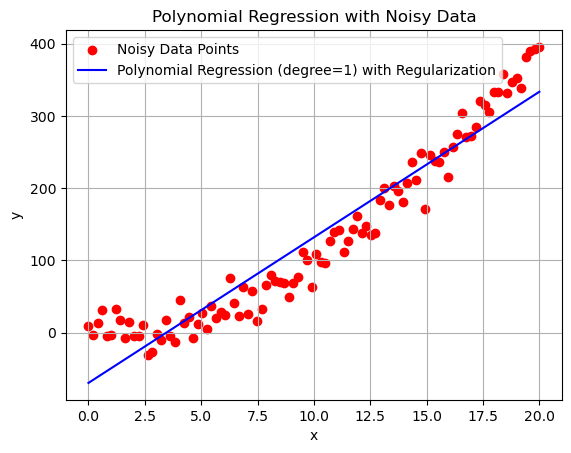

In [259]:
# Plot the original data points and the polynomial regression curve
plt.scatter(x, y, color="red", label="Noisy Data Points")  # Scatter plot for noisy data points
plt.plot(x, y_pred, color="blue", label=f"Polynomial Regression (degree={degree}) with Regularization")  # Regression curve
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression with Noisy Data")
plt.legend()
plt.grid(True)
plt.show()